 # 分類1:アヤメの判定

In [1]:
import unittest
import doctest
import os
path = os.path.dirname(os.path.abspath(__file__))

 ## アヤメの花を分類する

 ## データの前処理

 ### CSVファイルの読み込み

 #### データフレームの作成

In [2]:
import pandas as pd # pandasをインポート
# iris.csvファイルを読み込んで、データフレームに変換
file = path + '/data/iris.csv'
df = pd.read_csv(file)
df.head(3) # 先頭3行だけ表示

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa


 #### 正解データの確認（文字データの集計）

 #### uniqueメソッドで種類列の値を確認

In [3]:
df['種類'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

 #### array型の特定要素を参照

In [4]:
syurui = df['種類'].unique()
syurui[0]

'Iris-setosa'

 #### value_countsメソッドでデータの出現回数をカウント

In [5]:
df['種類'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: 種類, dtype: int64

 ### 欠損値の確認

 #### tailメソッドでデータフレームの末尾3行を表示

In [6]:
df.tail(3) # 末尾3行だけ表示

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,NaN,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


 #### isnullメソッドで欠損値の有無を確認

In [7]:
df.isnull() # 各マスが欠損値かどうかを確認

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


 #### anyメソッドで欠損値の有無を確認

In [8]:
# 列単位で欠損値が存在するか調べる
df.isnull().any(axis=0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

 #### sumメソッドで欠損値の数を確認

In [9]:
df.sum() # 列単位で欠損値の数を確認

がく片長さ                                                62.29
がく片幅                                                 65.62
花弁長さ                                                 72.04
花弁幅                                                  66.22
種類       Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object

 #### isnullメソッドとsumメソッドを組み合わせて欠損値の数を確認

In [10]:
# 各列に欠損値がいくつあるか確認
tmp = df.isnull()
tmp.sum()

がく片長さ    2
がく片幅     1
花弁長さ     2
花弁幅      2
種類       0
dtype: int64

 ### 欠損値を含む行または列の削除

 #### dropnaメソッドで欠損値を含む行を削除

In [11]:
# 欠損値が1つでもある行を削除した結果を、df2に代入
df2 = df.dropna(how='any', axis=0)

df2.tail(3) # 欠損値の存在確認

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
146,0.56,0.21,0.69,0.46,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


 ### 欠損値の穴埋め

 #### fillnaメソッドで欠損値を穴埋め

In [12]:
df['花弁長さ'] = df['花弁長さ'].fillna(0)
df.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,0.00,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


 ### 代表値の計算

 #### meanメソッドで平均値を計算

In [13]:
# 数値列の各平均値を計算（文字列の列は自動的に除外してくれる）
df.mean()

がく片長さ    0.420878
がく片幅     0.440403
花弁長さ     0.480267
花弁幅      0.447432
dtype: float64

 #### 特定の列だけ計算する

In [14]:
df['がく片長さ'].mean()

0.42087837837837844

 #### 標準偏差の計算

In [15]:
df.std() # 各列の標準偏差

がく片長さ    0.228910
がく片幅     0.181137
花弁長さ     0.236909
花弁幅      0.309960
dtype: float64

 #### 平均値を求めてデータフレームの欠損値と置き換える

In [16]:
df = pd.read_csv(file)

# 各列の平均値を計算して、colmeanに代入
colmean = df.mean()

# 平均値で欠損値を穴埋めしてdf2に代入
df2 = df.fillna(colmean)

# 欠損値があるか確認
df2.isnull().any(axis=0)

がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

 ### 特徴量と正解データの取り出し

 #### 特徴量と正解データを変数に代入

In [17]:
xcol = ['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']

x = df2[xcol]
t = df2['種類']

 ## モデルの作成と学習

 ### 決定木の概要

 ### 乱数の利用と再現性

 ### モデルの作成

In [18]:
# モジュールのインポート
from sklearn import tree

# 決定木のモデルを作成
model = tree.DecisionTreeClassifier(max_depth=2, random_state=0)

 ### モデルの学習と正解率計算の落とし穴

 #### モデルの学習と正解率の計算

In [19]:
model.fit(x, t) # モデルの学習
model.score(x, t) # 学習済みモデルの正解率計算

0.94

 ## モデルの評価

 ### 訓練データとテストデータの分割（ホールドアウト法）

 #### 訓練データとテストデータに分割する

In [20]:
# 関数のインポート
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.3, random_state=0)

# x_train, y_trainが学習に利用する訓練データ
# x_test, y_testが検証に利用するテストデータ

 #### train_test_split関数の結果を確認

In [21]:
print(x_train.shape) # x_trainの行数と列数を表示
print(x_test.shape) # x_testの行数と列数を表示

(105, 4)
(45, 4)


 ### 正解率の計算

In [22]:
# 訓練データで再学習
model.fit(x_train, y_train)

# テストデータの予測結果と実際の答えが合致する正解率を計算
model.score(x_test, y_test)

0.9555555555555556

 ### モデルの保存

 #### モデルを保存する

In [23]:
import pickle # pickleモジュールのインポート

file = path + '/model/irismodel.pkl'
with open(file, 'wb') as f:
    pickle.dump(model, f)

 ## 決定木の図の作成

 ### 決定木の深さ

 #### 分岐条件の列を決める

In [24]:
model.tree_.feature

array([ 3, -2,  3, -2, -2], dtype=int64)

 ### 分岐条件のしきい値

 #### 分岐条件のしきい値を含む配列を返すtree_.threshold

In [25]:
model.tree_.threshold

array([ 0.275, -2.   ,  0.69 , -2.   , -2.   ])

 ### 末端ノードと種類の紐付け

 #### リーフに到達したデータの数を返すtree_.value

In [26]:
# ノード番号1,3,4に到達したアヤメの種類ごとの数
print(model.tree_.value[1]) # ノード番号1に到達したとき
print(model.tree_.value[3]) # ノード番号3に到達したとき
print(model.tree_.value[4]) # ノード番号4に到達したとき

[[34.  0.  0.]]
[[ 0. 31.  6.]]
[[ 0.  1. 33.]]


 #### classes_でアヤメの種類とグループ番号の対応を調べる

In [27]:
# アヤメの種類とグループ番号の対応
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

 #### plot_tree関数で簡単に決定木を描画する

[Text(0.4, 0.8333333333333334, 'PetalWidth <= 0.275\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'PetalWidth <= 0.69\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

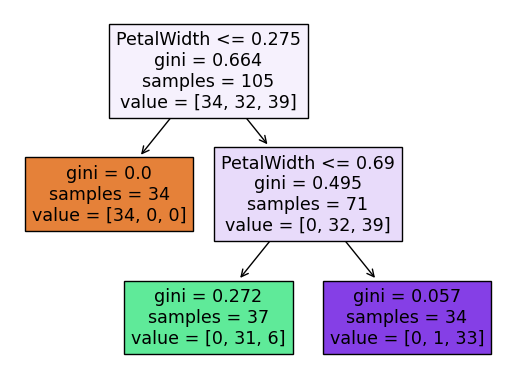

In [28]:
# 描画関数の仕様上、和名の特徴量を英字に直す
x_train.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# 描画関数の利用
from sklearn.tree import plot_tree

# plot_tree関数で決定木を描画
plot_tree(model, feature_names=x_train.columns, filled=True)

In [29]:
doctest.testmod(verbose=True)
unittest.main(argv=[''], verbosity=2, exit=False)

3 items had no tests:
    __main__
    __main__.__VSCODE_compute_hash
    __main__.__VSCODE_wrap_run_cell
0 tests in 3 items.
0 passed and 0 failed.
Test passed.



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK
